In [92]:
# import the necessary things for Python numerics, plotting, and universal constants
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import constants

Arrhenius (1889):
$$ k = A \mathrm{e}^\frac{-E_a}{R T} = A \mathrm{e}^\frac{-E_a}{k_B T},$$
where $k$ is the rate constant or frequency of collisions in a reaction, $T$ is the absolute temperature (in Kelvin!), $A$ is a proportionality factor originally thought to be independent of $T$, $E_a$ is the activation energy of the reaction (in J / mol), and $R$ is the universal gas constant (in J / K / mol). 
Alternatively, given Boltzmann's constant $k_B$ (in J/K) and $E_a$ per molecule rather than per mole (in J).

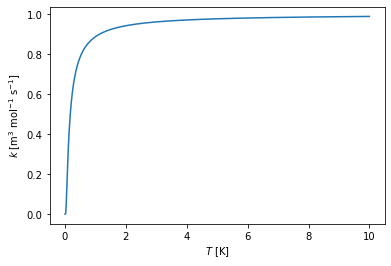

In [93]:
# let's define and plot this function
def arrhenius(T, Ea, A=1.0,n=0.0):
    return A*(T**n)*np.exp(-Ea/(constants.R*T))

# sample the function at logarithmically space temperatures
T = np.logspace(-3,+1,1025)

plt.plot(T, arrhenius(T, 1.0))
plt.xlabel(r"$T$ [K]")
plt.ylabel(r"$k$ [m$^3$ mol$^{-1}$ s$^{-1}$]")
plt.show()

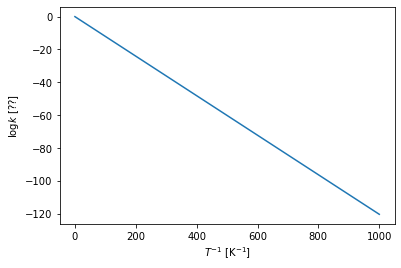

In [94]:
# plotting the inverse temperature against the log of the reaction rate gives a linear plot
plt.plot(1.0/T, np.log(arrhenius(T,1.0)))
plt.xlabel(r"$T^{-1}$ [K$^{-1}$]")
plt.ylabel(r"$\log k$ [??]")
plt.show()

This linear relationship is:
$$ \log k = \frac{-E_a}{R}\left(\frac{1}{T}\right) + \log A,$$
so the slope of the curve is $(-E_a/R)$ and the y-intercept is $\log A$.

Since we are measuring the _period_ $P$, instead of the reaction rate $k$, we will identify $k = 1/P$ (which is only approximate).

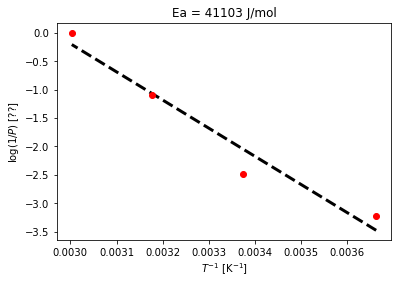

In [95]:
# Record data:
T = (np.array([32, 74, 107, 140])-32)/1.8 + 273 # Fahrenheit -> Kelvin!
P = np.array( [25, 12,   3,   1]) # period of oscillation in seconds

# fit data
def func(x, a, b):
    return -(b/constants.R)*x + np.log(a)
popt, _ = optimize.curve_fit(func, 1.0/T, np.log(1.0/P))

Ea = popt[1]

# plot data
plt.plot(1.0 / T, np.log(arrhenius(T,popt[1],A=popt[0])),"--k", linewidth=3)
plt.plot(1.0 / T, np.log(1.0/P), "or")
plt.xlabel(r"$T^{-1}$ [K$^{-1}$]")
plt.ylabel(r"$\log(1/P)$ [??]")
plt.title(r"Ea = {0} J/mol".format(int(np.round(Ea))))
plt.show()